# Auto-Mobile Data EDA

In [2]:
am_data = pd.read_csv("./Automobile_data.csv")
am_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
am_data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [4]:
am_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
am_data.dropna(how="any", inplace=True)

In [6]:
am_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

- NaN 데이터가 없다는 것을 알 수 있다. 하지만 normalized-losses 컬럼의 ? 값은 숫자로 변환해줘야한다.

In [7]:
am_data['normalized-losses'].str.isnumeric().value_counts()

True     164
False     41
Name: normalized-losses, dtype: int64

In [8]:
nl = am_data['normalized-losses'].loc[am_data['normalized-losses'] != '?']

In [9]:
nlmean = nl.astype(int).mean()

In [10]:
nlmean

122.0

In [11]:
am_data['normalized-losses'] = am_data['normalized-losses'].replace('?',nlmean).astype(int)

In [12]:
am_data['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

- normalized-losses 컬럼의 ? 값을 나머지 값들의 평균값으로 대체해 주었다.

In [13]:
am_data['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [14]:
am_data['price'].loc[am_data['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [15]:
price = am_data['price'].loc[am_data['price'].str.isnumeric() == True]

In [16]:
pricemean = price.astype(int).mean()
pricemean

13207.129353233831

In [17]:
am_data['price'] = am_data['price'].replace('?', pricemean).astype(int)
am_data['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

- price 컬럼의 ? 값을 나머지 값들의 평균값으로 대체해 주었다.

In [18]:
am_data['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [19]:
am_data['horsepower'].loc[am_data['horsepower'].str.isnumeric() == False]

130    ?
131    ?
Name: horsepower, dtype: object

In [20]:
horsepower = am_data['horsepower'].loc[am_data['horsepower'].str.isnumeric() == True]
horsepowermean = horsepower.astype(int).mean()
horsepowermean

104.25615763546799

In [21]:
am_data['horsepower'] = am_data['horsepower'].replace('?', horsepowermean).astype(int)
am_data['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

- horsepower 컬럼의 ? 값을 나머지 값들의 평균값으로 대체해 주었다.

In [22]:
am_data['bore'].loc[am_data['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [23]:
am_data['bore'] = pd.to_numeric(am_data['bore'],errors='coerce')

In [24]:
am_data['bore'][am_data['bore'].isnull() == True]

55   NaN
56   NaN
57   NaN
58   NaN
Name: bore, dtype: float64

In [25]:
am_data['stroke'] = pd.to_numeric(am_data['stroke'],errors='coerce')

In [26]:
am_data['num-of-doors'] = pd.to_numeric(am_data['num-of-doors'],errors='coerce')

In [27]:
am_data['peak-rpm'] = pd.to_numeric(am_data['peak-rpm'],errors='coerce')

In [28]:
% matplotlib inline

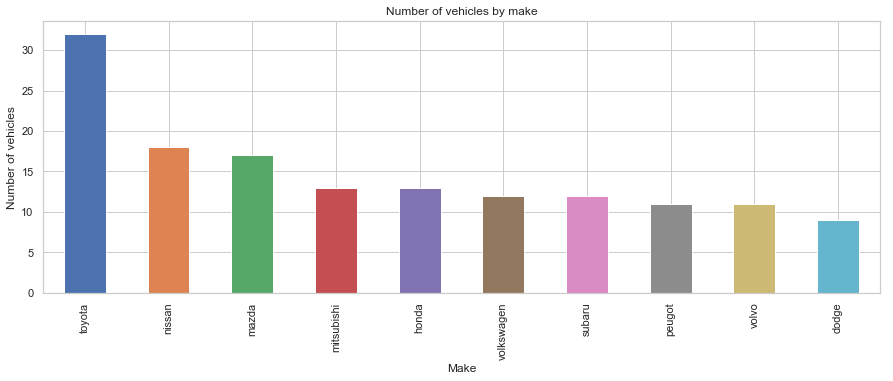

In [35]:
am_data["make"].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

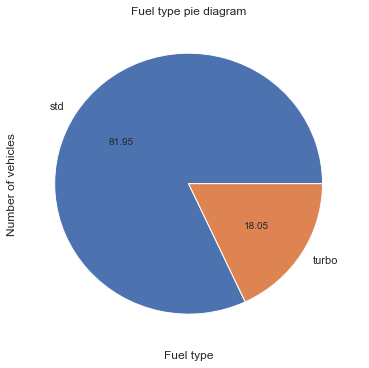

In [36]:
am_data['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');